<a href="https://colab.research.google.com/github/DhirajBembade/DL-NLP/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load dataset**

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) =load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 1)
(10000, 32, 32, 3)


In [3]:
import matplotlib.pyplot as plt
def show_img(X_train,class_names,y_train,nb_samples=12,nb_row=4):
  plt.figure(figsize=(12,12))
  for i in range(nb_samples):
    plt.subplot(nb_row,nb_row,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
  plt.show()


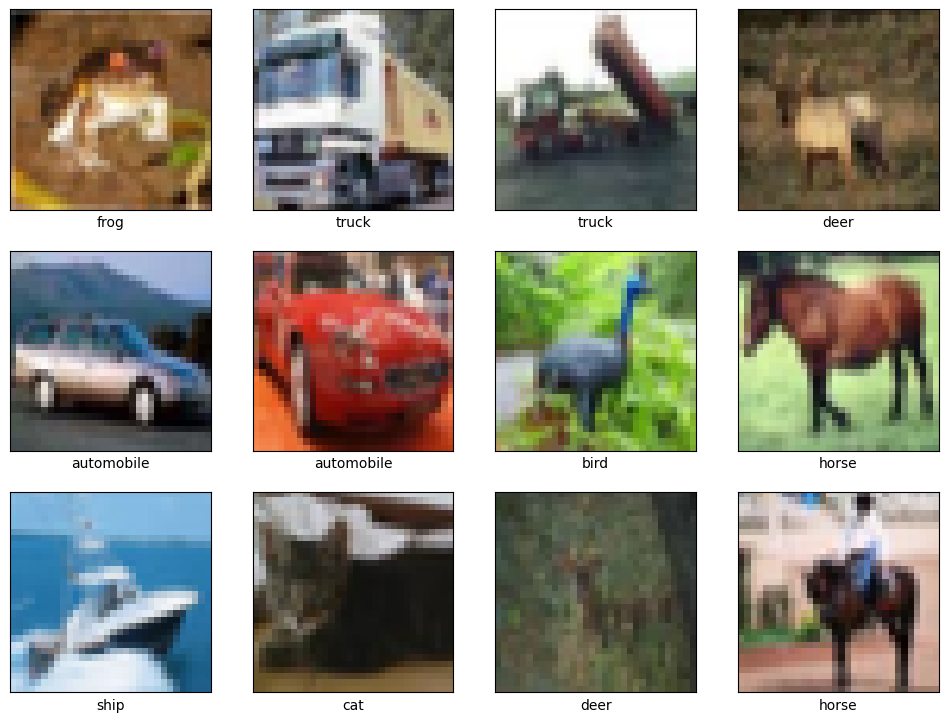

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
show_img(X_train,class_names,y_train)

# **Data preprocessing**
Prior to training the model, we need to normalize the pixel values of the data in the same range (e.g. 0 to 1). This is a common preprocessing step when dealing with images to ensure scale invariance, and faster convergence during the training

In [5]:
max_pixel_value = 255

X_train = X_train/ max_pixel_value
X_test = X_test / max_pixel_value

In [6]:
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))



In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [8]:
# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

In [9]:
model=Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# **model training**

In [11]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 5

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(X_train, y_train,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(X_test, y_test))

1563/1563 [==============================] - 74s 45ms/step - loss: 1.4247 - accuracy: 0.4897 - precision: 0.7130 - recall: 0.2643 - val_loss: 1.1869 - val_accuracy: 0.5876 - val_precision: 0.7726 - val_recall: 0.3774


In [12]:
import numpy as np

313/313 [==============================] - 4s 12ms/step


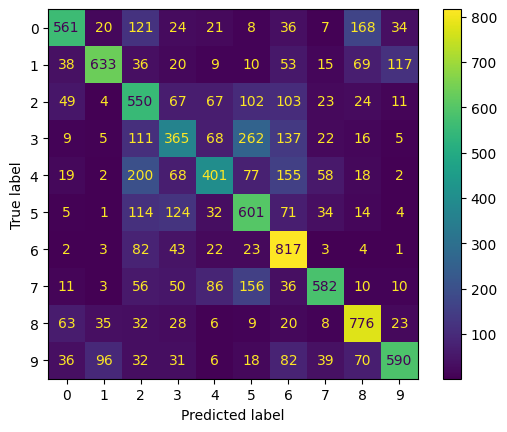

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(X_test)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [14]:
test_true_labels.shape

(10000,)

In [15]:
test_predicted_labels.shape

(10000,)

In [16]:
y_test.shape

(10000, 10)

In [17]:
test_predictions

array([[2.69157230e-03, 2.98975880e-04, 6.20698556e-02, ...,
        1.99774839e-03, 4.26538847e-03, 8.16298299e-04],
       [3.05324614e-01, 1.43178329e-01, 1.17227191e-03, ...,
        4.31319932e-05, 5.19090176e-01, 3.05063967e-02],
       [1.57717004e-01, 1.44431680e-01, 1.41600426e-02, ...,
        1.59026159e-03, 6.29048288e-01, 4.30843830e-02],
       ...,
       [3.39540973e-04, 8.59848442e-05, 2.23333791e-01, ...,
        5.21887951e-02, 1.01919526e-04, 4.61441581e-04],
       [2.87019201e-02, 1.04225971e-01, 1.21152043e-01, ...,
        1.01896012e-02, 1.24390831e-03, 2.18115211e-03],
       [1.19152945e-03, 6.79196324e-04, 4.47951667e-02, ...,
        6.33523047e-01, 2.74569349e-04, 1.41900731e-03]], dtype=float32)



---



In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
750/750 [==============================] - 42s 55ms/step - loss: 0.2000 - accuracy: 0.9399 - val_loss: 0.0772 - val_accuracy: 0.9758
Epoch 2/3
750/750 [==============================] - 43s 57ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0517 - val_accuracy: 0.9843
Epoch 3/3
313/313 [==============================] - 3s 8ms/step - loss: 0.0338 - accuracy: 0.9897
Test accuracy: 0.9897000193595886
